## Projeto 4 - ÁLgebra Linear e Matrizes Aleatórias

##### Integrantes: Adriel e Gabrielle Scherer Mascarelo

***********************

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

##### **Questão 1. Matrizes Gaussianas.** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A \sim \mathcal{N}(0, 1)$.

##### a) **Distribuição das normas.** Faça um histograma da norma-$2$ das colunas de uma matriz gaussiana $A$, $m \times n$. Use vários valores de $m$, e comente o que você observa.

*Solução:* Abaixo está o código para gerar os histogramas correspondentes à norma-2 de matrizes normais com $1000$ colunas e uma quantidade variável de linhas.


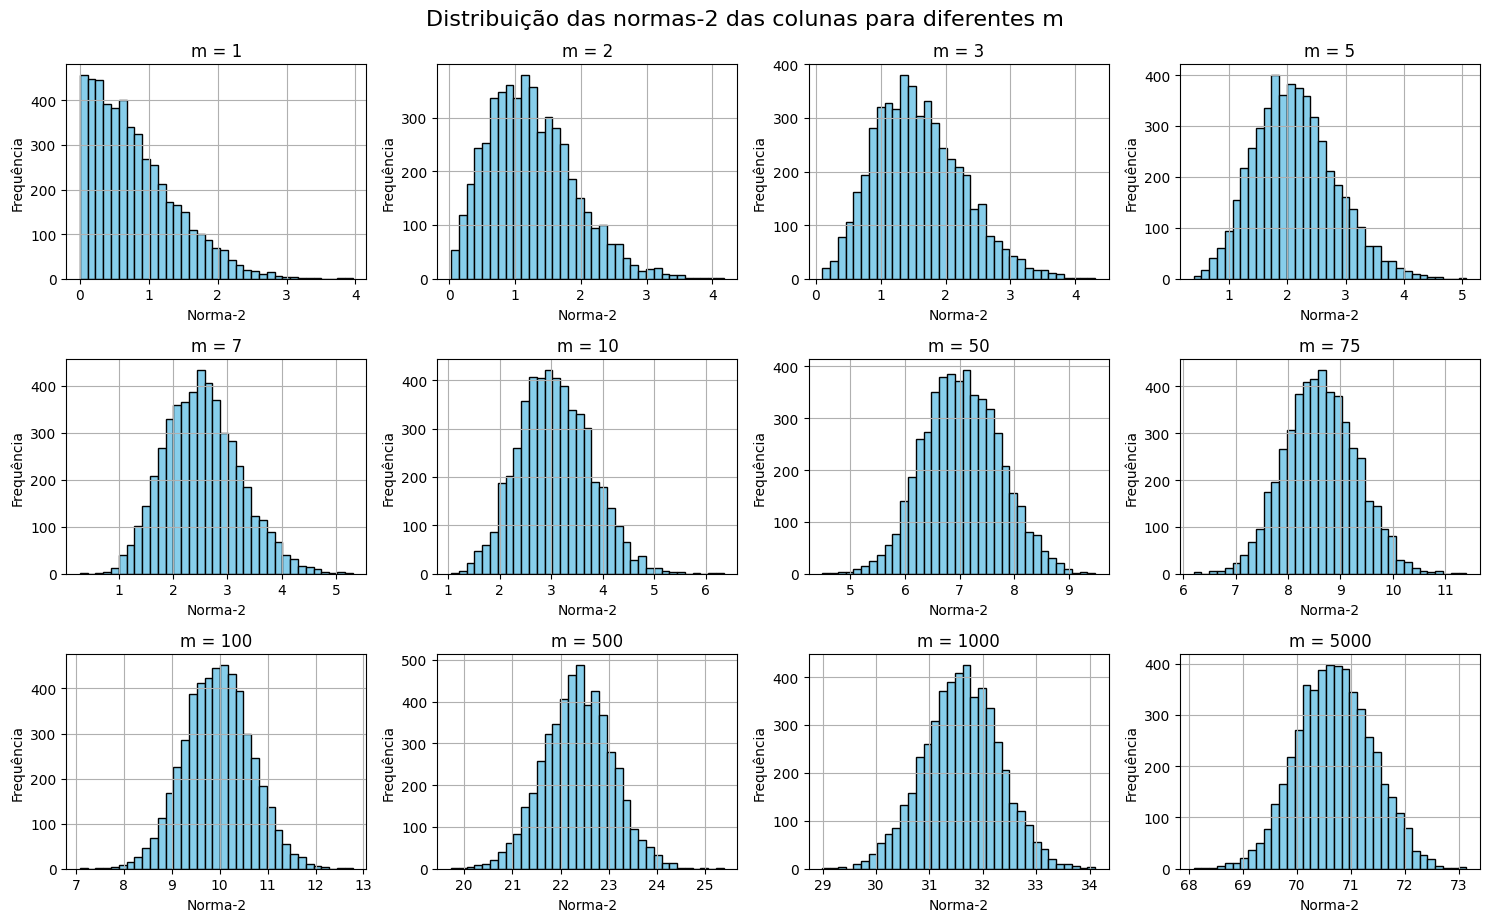

In [2]:
np.random.seed(1)

n = 5000  # n colunas
m_values = [1, 2, 3, 5, 7, 10, 50, 75, 100, 500, 1000, 5000]  # diferentes n de linhas

plt.figure(figsize=(15, 9))

for i, m in enumerate(m_values, 1):
    A = np.random.randn(m, n)  # matriz m x n a_ij ~ N(0,1)
    norms = np.linalg.norm(A, axis=0)  
    plt.subplot(3, 4, i)
    plt.hist(norms, bins=35, color='skyblue', edgecolor='black')
    plt.title(f'm = {m}')
    plt.xlabel('Norma-2')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribuição das normas-2 das colunas para diferentes m", fontsize=16, y=1.02)
plt.show()

Observa-se que, aumentando o número $m$ de linhas da matriz, o formato geral do histograma das normas das colunas das matrizes gaussianas vai se aproximando a uma distribuição normal. No caso extremo $m=1$, aparentamos enxergar como se fosse a metade direita de uma curva normal, menos acentuada. Isso se dá porque estamos calculando as normas de muitos números com módulo entre 0 e 1. Nesse intervalo específico, quanto menor o número é em módulo, menor ainda será seu quadrado, por isso o acûmulo nos menores valores. Isso pode ser visto no gráfico da parabóla de $x^2$ nesse intervalo. 

Seja uma coluna de $A$: $A_j \in \mathbb{R^m}$ com entradas $A_{i,j} \sim \mathcal{N} \ \forall i=1, 2, \dots, m \implies ||A_j||_2^2 = A_{1,j}^2 + \dots + A_{m,j}^2 $ 

Como cada $A_{i,j}$ é uma variável aleatória (VA) normal padrão. Assim, $||A_j||_2^2$ é a soma de $m$ dessas variáveis independentes e identicamente distribuídas (i.i.d.). Sabemos (da matéria Teoria da Probabilidade) pelo Teorema do Limite Central (TLC) que, quando $m$ (o número de amostras) é grande, a distribuição da soma (e de sua raiz quadrada) se aproxima de uma distribuição normal, independentemente da distribuição original de cada termo. 

Conforme $m$ aumenta, a média do histograma se desloca para a direita, até o momento que todo o histograma se move para a direita no eixo $x$ a partir de $m=7$. Analisando melhor essa média:

$E\left[\|A_i\|_2^2\right] = E\left[\sum_{k=1}^{m} A_{ki}^2\right] = \sum_{k=1}^{m} E\left[A_{ki}^2\right]$ . Obtendo $E\left[A_{ki}^2\right]$ da variância conhecida:

$Var(X) = E[X^2] - (E[X])^2 = 1$. Como a média $E[X]$ é 0, temos que $E[X^2] = 1$. Aplicando isso a cada componente $A_{ki}$:

$
E\left[A_{ki}^2\right] = 1 \implies E\left[\|A_i\|_2^2\right] = \sum_{k=1}^{m} 1 = m \implies \|A_i\|_2^2 \approx m \implies \|A_i\|_2 \approx \sqrt{m}
$

E esse resultado condiz com os gráficos de $m$ grandes (a partir de 50 poderíamos dizer) obtidos.

##### b) **Produtos internos.** Agora, fixe $m=100$ e faça o histograma do produto interno $\langle A_i, A_j \rangle$ entre as colunas de uma matriz gaussiana $A$. Exclua os casos $i=j$, e use $n=100, 200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

*Solução:* Fixando $m=100$ e variando o número de colunas, temos:

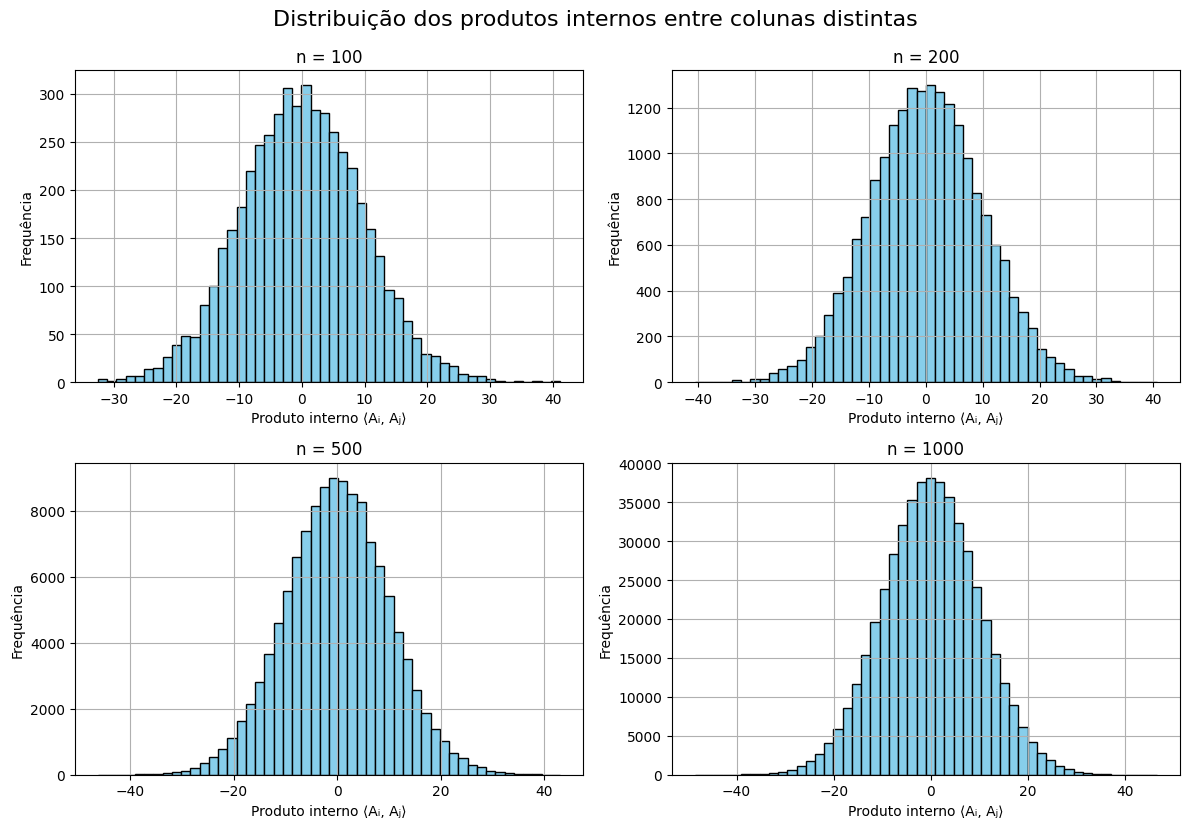

In [3]:
np.random.seed(0)

def dot_prod(A): 
    n = A.shape[1]
    dots = []
    for i in range(n):
        for j in range(i+1, n):
            dot = np.dot(A[:, i], A[:, j])
            dots.append(dot)
    return np.array(dots)

m = 100
n_values = [100, 200, 500, 1000]

plt.figure(figsize=(12, 8))

for i, n in enumerate(n_values, 1):
    A = np.random.randn(m, n)
    prods = dot_prod(A)

    plt.subplot(2, 2, i)
    plt.hist(prods, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'n = {n}')
    plt.xlabel('Produto interno ⟨Aᵢ, Aⱼ⟩')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Distribuição dos produtos internos entre colunas distintas', fontsize=16, y=1.03)
plt.show()

Conforme essas 4 iterações passam o gráfico parece novamente se assimilar cada vez mais a uma curva de distribuição normal, sendo mais assimétrico e irregular nas primeiras iterações e mais uniforme e suave na última, parecendo ter média 0 e com caudas se entendendo até 45 unidades de distância da média (tendo uma frequência que o computador arredonda para 0 no 45 e -45 do eixo x). Analisando mais aprofundadamente, esse produto interno tem a forma:

$\langle A_i, A_j \rangle = A_{1,i}*A_{1,j} + ... + A_{m,i}*A_{m,j}$

Cada produto $A_{k,i}*A_{k,j}$ é uma nova variável aleatória, independente e identicamente distribuída dos outros produtos. O produto interno das colunas é a soma desses produtos i.i.d. para $k=1,...,m$, e, repetindo, o TLC afirma que a soma de um grande número de VA's i.i.d tende a seguir uma distribuição Normal, independentemente da distribuição original de cada termo. 

Averiguando a média e a variância dos gráficos:

$E[\langle A_i, A_j \rangle] = \sum_{k=1}^{m} E[A_{ki} A_{kj}] = \sum_{k=1}^{m} (E[A_{ki}] \cdot E[A_{kj}]) = 0$ já que as entradas são independentes e tem média 0.

$Var(\langle A_i, A_j \rangle) = \sum_{k=1}^{m} Var(A_{ki} A_{kj})$ já que os produtos são independentes.

E, já que $Var(A_{ki} A_{kj})=1$ para $k=1,...,m$ , tem-se:

$Var(\langle A_i, A_j \rangle) = \sum_{k=1}^{m} 1 = m \implies \sigma = \sqrt{Var(\langle A_i, A_j \rangle)} = \sqrt{m}$

$\implies \langle A_i, A_j \rangle \sim \mathcal{N}(0, m) = \mathcal{N}(0,10^2)$

Agora, por que conforme $n$ aumenta temos uma curva mais suave se todas elas tem essa distribuição?

A variável $n$ altera o tamanho da amostra usada para gerar o histograma. O número de produtos internos distintos que podemos calcular corresponde ao número de maneiras de escolher 2 colunas de um total de $n$, $\binom{n}{2} = \frac{n(n-1)}{2}$.

Para $n=100$, o número de amostras é: $ \binom{100}{2} = 4.950 $.
Para $n=1000$, o número de amostras aumenta para: $ \binom{1000}{2} = 499.500 $.

Este aumento no número de amostras (e das frequências dos resultados, no eixo y) faz com que o histograma se torne muito mais suave e preciso.


##### c) **A distribuição do máximo.** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{|\langle A_i, A_j \rangle|}{||A_i||.||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isso, gere $K=1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

*Solução:* Essa fórmula representa o módulo do cosseno do ângulo entre os vetores das colunas $A_i$ e $A_j$, que vemos desde o primeiro período em Geometria Analítica. Ela só assume valores do intervalo $[0,1]$, pela desigualdade de Cauchy-Schwarz:

$|\langle A_i, A_j \rangle| \leq ||A_i||.||A_j||$ $\implies$ $\frac{|\langle A_i, A_j \rangle|}{||A_i||.||A_j||} \leq 1$

e porque o numerador é um valor absoluto, é sempre maior ou igual a zero.

Quanto mais esse valor tende a 1, menos ortogonais e mais colineares eles são, já que $|cos(θ)|=1 \implies θ = \{0^o, 180^o\}$.

Quanto mais esse valor tende a 0, mais ortognais eles são, sendo de fato ortogonais quando $θ=90^o$ e $|cos(90^o)|=0$

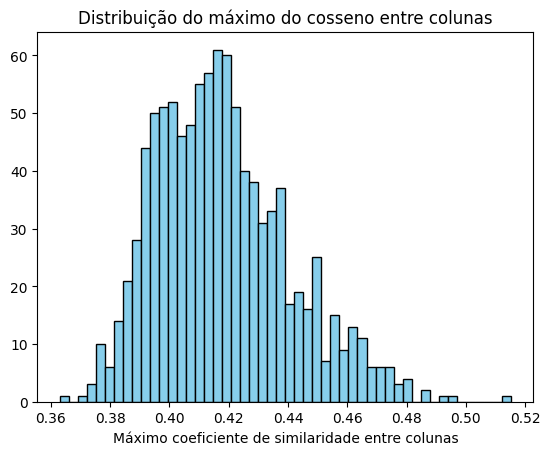

In [ ]:
#função para retornar os valores |<Ai,Aj>|/||Ai||.||Aj||
np.random.seed(0)

def max_cos(A):
    n = A.shape[1]
    max_val = 0
    for i in range(n):
        for j in range(i + 1, n):
            dp = abs(np.dot(A[:, i], A[:, j]))
            norm_prod = np.linalg.norm(A[:, i]) * np.linalg.norm(A[:, j])
            val = dp / norm_prod
            if val > max_val:
                max_val = val
    return max_val

results = []

for _ in range(1000):
    A = np.random.randn(100, 300)
    max_sim = max_cos(A)
    results.append(max_sim)

plt.hist(results, bins=50, edgecolor='black',color='skyblue')
plt.title('Distribuição do máximo do cosseno entre colunas')
plt.xlabel('Máximo coeficiente de similaridade entre colunas')
plt.show()

Aqui, conseguimos enxergar que os valores para esse ínidice estão entre $0.38$ e $0.52$, permitindo enxergar que em nenhum momento temos colunas perfeitamente ortogonais e nem completamente alinhadas, mesmo eles estando mais perto da ortogonalidade. O valor mais frequente aparenta estar perto de $0.42$

O resultado a primeira vista parece contraintuitivo, porque vimos na $b)$ que o númerador dessa fração é uma VA de média zero. Além disso, ao dividi-lo pelo produto das normas, que pode ser estimado para $\sqrt m * \sqrt m = m = 100$, o valor fica mais próximo de 0 ainda. Em outras palavras, dois vetores aleatórios em alta dimensão são quase sempre quase ortogonais.

Porém, nesta questão, esse número não é o medidor de ortogonalidade de um par aleatório. Para cada matriz $100 \times 300$, calculamos a similaridade para todos os $\binom{2}{300} = 44.850$ pares de colunas e guardamos apenas o maior valor. Dentre tantos valores possíveis, é razoavel que o maior deles não seja tão perto de 0 quanto esperavamos, ou seja, que algum desses pares de vetores seja parcialmente ortogonal.

Pesquisando sobre "distribuição do máximo" na internet, 

....................................... pesquisar:

"Teoria dos Valores Extremos"
"Distribuição de Gumbel"
"Estatística de extremos"
"Teorema de Fisher-Tippett-Gnedenko"

##### d) **Complexidade computacional.** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

*Solução:* O número de pares de coluna é $\binom{n}{2} = O(n^2)$ . Para cada par temos $m$ multiplicações e $m-1$ adições para o produto interno, além do cálculo da norma das colunas que pode ser feito em $O(n*m)$ . Assim, temos $O(n^2) * O(m) + O(n*m) = O(n^2*m)$ . Para uma matriz $100 \times 300$ teríamos $9.000.000$ operações nesse cálculo, mostrando que não é algo trivial. Testando alguns valores para $K$:

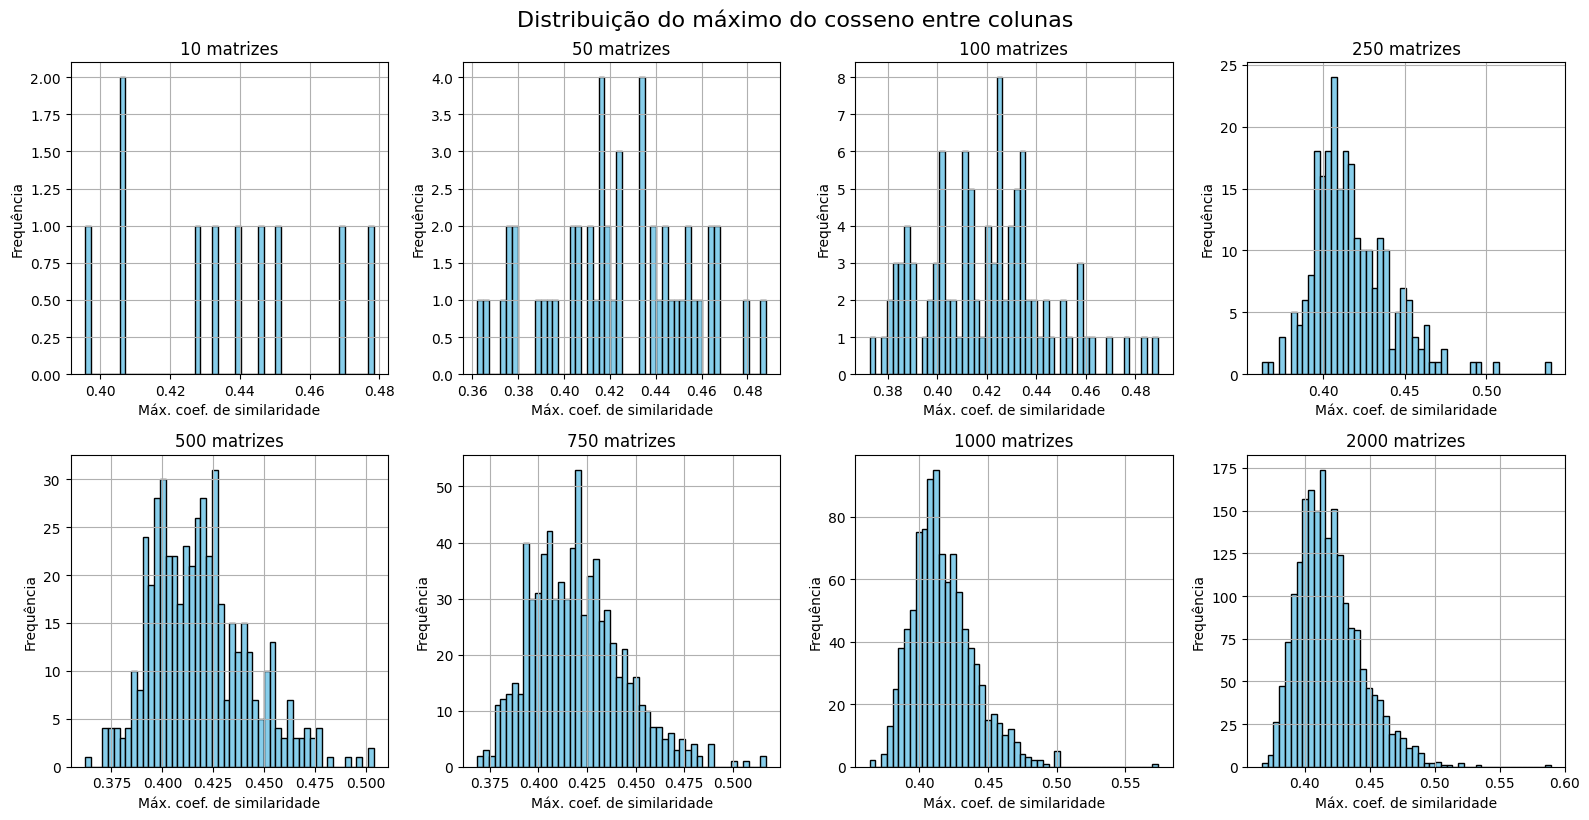

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, each in enumerate([10, 50, 100,250, 500, 750, 1000, 2000]):
    results = []
    for _ in range(each):
        A = np.random.randn(100, 300)
        max_sim = max_cos(A)
        results.append(max_sim)

    ax = axes[i // 4][i % 4]
    ax.hist(results, bins=50, edgecolor='black', color='skyblue')
    ax.set_title(f'{each} matrizes')
    ax.set_xlabel('Máx. coef. de similaridade')
    ax.set_ylabel('Frequência')
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Distribuição do máximo do cosseno entre colunas', fontsize=16, y=1.02)
plt.show()

Com os primeiros valores escolhidos para K vemos que o gráfico tem lacunas e não aparenta ser uma distribuição conhecida ou ter um padrão. A partir de $K=250$ começamos a enxergar com mais clareza algo parecido com a distribuição de Gumbel dos valores extremos que citamos na c). 

##### e) **A distribuição do máximo, parte 2.** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m,n)$: $(100,100), (100, 300), (200, 200), (200, 600), (500,500), (500, 1500), (1000, 1000), (1000, 3000)$

In [6]:
k=None

values_of_mn = [(100, 100),(100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)]
for i, each in enumerate([10, 50, 100, 500, 1000, 2000]):
    for m,n in values_of_mn:
        print(m,n)
        results = []
        A = np.random.randn(m,n)
        max_sim = max_cos(A)
        results.append(max_sim)



100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000
100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000
100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000
100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000
100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000
100 100
100 300
200 200
200 600
500 500
500 1500
1000 1000
1000 3000


KeyboardInterrupt: 